## 11. BJT Static Characterisitcs
### 11.1 Ideal transistor analysis
### 11.1.1 solution stratergy
#### Basic Assumption
#### Notation
#### Diffusion Equations/boundary conditions
#### Computational Relationships

### 11.1.2 General Solution(W arbitrary)
#### Emitter/Collector Region solutions
#### Base Region Solution
$$I_{Ep}=qA\frac{D_B}{L_B}p_{B0}\left[\frac{cosh(W/L_B)}{sinh(W/L_B)}(e^{qV_{EB}/kT}-1)-\frac{1}{sinh(W/L_B)}(e^{qV_{CB}/kT}-1)\right]$$
$$I_{Cp}=qA\frac{D_B}{L_B}p_{B0}\left[\frac{1}{sinh(W/L_B)}(e^{qV_{EB}/kT}-1)-\frac{cosh(W/L_B)}{sinh(W/L_B)}(e^{qV_{CB}/kT}-1)\right]$$
#### Performance parameters/Terminal currents

$$I_E=qA\left[\left(\frac{D_E}{L_E}n_{E0}+\frac{D_B}{L_B}p_{B0}\frac{cosh(W/L_B)}{sinh(W/L_B)}\right)(e^{qV_{EB}/kT} -1)-\left(\frac{D_B}{L_B}p_{B0}\frac{1}{sinh(W/L_B)}\right)(e^{qV_{CB}/kT} -1) \right] $$
$$I_C=qA\left[\left(\frac{D_B}{L_B}p_{B0}\frac{1}{sinh(W/L_B)}\right)(e^{qV_{EB}/kT} -1)-\left(\frac{D_C}{L_C}n_{C0}+\frac{D_B}{L_B}p_{B0}\frac{cosh(W/L_B)}{sinh(W/L_B)}\right)(e^{qV_{CB}/kT} -1) \right] $$

Exercise 11.1

In the limit where $W\gg L_B$ or $W/L_B\rightarrow\infty$
$$\frac{cosh(W/L_B)}{sinh(W/L_B)}=\frac{e^{W/L_B}+e^{-W/L_B}}{e^{W/L_B}-e^{-W/L_B}} \rightarrow 1$$
$$\frac{1}{sinh(W/L_B)}=\frac{2}{e^{W/L_B}-e^{-W/L_B}}\rightarrow 0 $$

when the above limiting values for the hyperbolic functions are substituted, the results is
$$I_E=qA\left(\frac{D_E}{L_E}n_{E0}+\frac{D_B}{L_B}p_{B0}\right)(e^{qV_{EB}/kT} -1) $$
$$I_C=-qA\left(\frac{D_C}{L_B}n_{E0}+\frac{D_B}{L_B}p_{B0}\right)(e^{qV_{CB}/kT} -1) $$

if $V_CB=0$ the $\left[exp(qV_{CB}/kT)-1 \right]$ term vanishes
$$I_E=qA\left[\left(\frac{D_E}{L_E}n_{E0}+\frac{D_B}{L_B}p_{B0}\frac{cosh(W/L_B)}{sinh(W/L_B)}\right)(e^{qV_{EB}/kT} -1) \right] $$

### 11.1.3 Simplified Relationships $(W\ll L_B)$
#### $\Delta p_B(x)$ in the Base
$$\Delta p_B(x)=\Delta p_B(0)+[\Delta p_B(W)-\Delta p_B(0)]\frac{x}{W} $$

#### Performace Parameters
$$\gamma = \frac{1}{1+\frac{D_E}{D_B}\frac{N_B}{N_E}\frac{W}{L_E}} $$
$$\alpha_T = \frac{1}{1+\frac{1}{2}\left(\frac{W}{L_E}\right)^2} $$
$$\alpha_{dc} = \frac{1}{1+\frac{D_E}{D_B}\frac{N_B}{N_E}\frac{W}{L_E}+\frac{1}{2}\left(\frac{W}{L_E}\right)^2} $$
$$\beta_{dc} = \frac{1}{\frac{D_E}{D_B}\frac{N_B}{N_E}\frac{W}{L_E}+\frac{1}{2}\left(\frac{W}{L_E}\right)^2} $$

$N_E \gg N_B $ leads to an emitter efficiency near unity\
$W \ll L_B $ is required to achieve a base transport factor close to unity 

In [10]:
from constant import q,m0,e0,hbar,mn,e_si,k,kB,mp,kT_q,Eg,Nc,Nv,ni,mun,mup,resistancep
import numpy as np, matplotlib.pyplot as plt

NE=1e18; muE=263; DE=6.81; tauE=1e-7; LE=8.25e-4
NB=1e16; muB=437; DB=11.3; tauB=1e-6; LB=3.36e-3; W=2e-4
NC=1e15; muC=1345; DC=34.8; tauC=1e-6; LC=5.90e-3

cons1=DE/DB*NB/NE*W/LE
cons2=0.5*(W/LB)**2
print("cons1=%.2e"%cons1,"cons2=%.2e"%cons2 )
gamma=1/(1+cons1)
alphaT=1/(1+cons2)
alphadc=1/(1+cons1+cons2)
betadc=1/(cons1+cons2)
print(f"gamma={gamma:.4f}, alphaT={alphaT:.4f},alphadc={alphadc:.4f},betadc={betadc:.4f}")

cons1=1.46e-03 cons2=1.77e-03
gamma=0.9985, alphaT=0.9982,alphadc=0.9968,betadc=309.3558


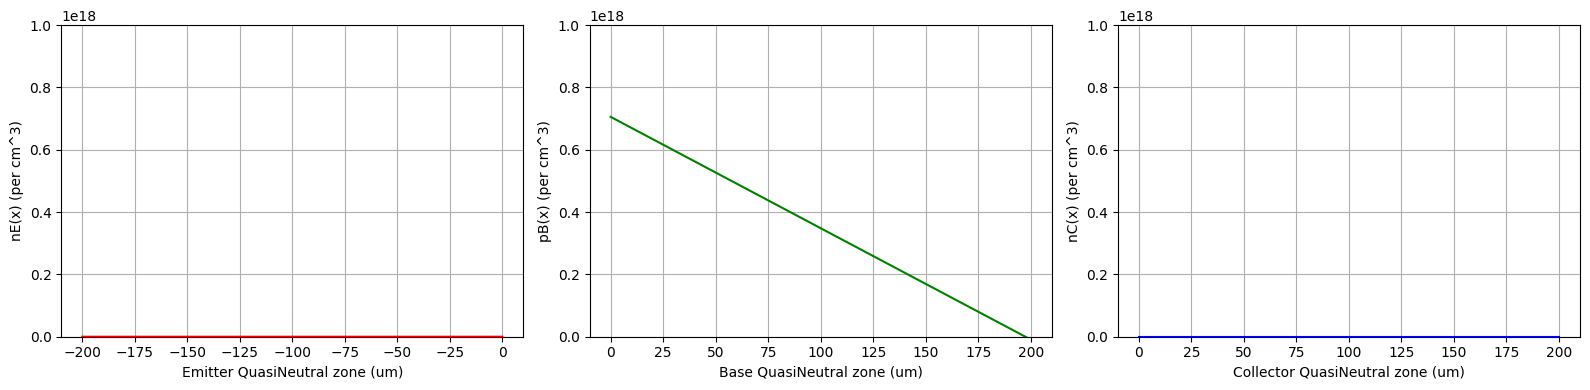

(None, None)

In [104]:
# Exercise 11.3
import numpy as np
import matplotlib.pyplot as plt

# Defining Constants
k = 8.617e-5  # Boltzmann constant (eV/K)
T = 300  # Temperature in K
e0 = 8.85e-14  # Vacuum permittivity (F/cm)
q = 1.602e-19  # Elementary charge (C)
Ks = 11.8  # Relative permittivity
ni = 1.0e10  # Intrinsic carrier concentration (per cm^3)

# Given Parameters
Wb = 2e-4  # Base width (cm)
A = 1e-4  # Area (cm^2)
Ne = 1.0e18  # Donor concentration (per cm^3)
Nb = 1.0e16  # Base concentration (per cm^3)
Nc = 1.0e15  # Acceptor concentration (per cm^3)
De = 6.81  # Diffusion coefficient for electrons (cm^2/s)
Db = 11.3  # Diffusion coefficient for holes (cm^2/s)
Dc = 34.8  # Diffusion coefficient for holes (cm^2/s)
Le = 8.25e-4  # Diffusion length for electrons (cm)
Lb = 3.36e-3  # Diffusion length for holes in base (cm)
Lc = 5.9e-3  # Diffusion length for holes in collector (cm)
Veb = 0.7  # Base-emitter voltage (V)
Vcb = -5  # Collector-base voltage (V)
ne0 = ni**2 / Ne  # Minority carrier concentration in emitter
pb0 = ni**2 / Nb  # Minority carrier concentration in base
nc0 = ni**2 / Nc  # Minority carrier concentration in collector
Vbieb = (k * T) * np.log(Ne * Nb / ni**2)  # Base-emitter built-in voltage
Vbicb = (k * T) * np.log(Nc * Nb / ni**2)  # Collector-base built-in voltage

# Effective Base Width (W)
x_eb = (2 * Ks * e0 / q) * (Ne / (Nb * (Ne + Nb))) * (Vbieb - Veb)
xeb = np.sqrt(x_eb)

x_cb = (2 * Ks * e0 / q) * (Nc / (Nb * (Nc + Nb))) * (Vbicb - Vcb)
xcb = np.sqrt(x_cb)

W = Wb - xeb - xcb

# Minority Carrier Concentration in Quasi-Neutral Regions
x = np.linspace(0, 0.02, 101)
ne = ne0 * (np.exp(Veb / (k * T)) - 1) * np.exp(-x / Le)
nc = nc0 * (np.exp(Vcb / (k * T)) - 1) * np.exp(-x / Lc)
dpb0 = pb0 * (np.exp(Veb / (k * T)) - 1)
dpbw = pb0 * (np.exp(Vcb / (k * T)) - 1)
pb = dpb0 + (dpbw - dpb0) * (x / W)

plt.figure(figsize=(16,4))
plt.subplot(131)
plt.plot(-x*1e4, ne, 'r-')
plt.ylim(0,1e18)
plt.xlabel('Emitter QuasiNeutral zone (um)')
plt.ylabel('nE(x) (per cm^3)')
plt.grid()

plt.subplot(132)
plt.plot(x*1e4, pb+7e17, 'g-')
plt.ylim(0,1e18)
plt.xlabel('Base QuasiNeutral zone (um)')
plt.ylabel('pB(x) (per cm^3)')
plt.grid()

plt.subplot(133)
plt.plot(x*1e4, -nc, 'b-')
plt.ylim(0,1e18)
plt.xlabel('Collector QuasiNeutral zone (um)')
plt.ylabel('nC(x) (per cm^3)')
plt.grid()

plt.tight_layout(), plt.show()


### 11.1.4 Ebers-Moll Equations and Model
### 11.2 Deviations from the Ideal
### 11.2.1 Ideal theroy/Experiment Comparison
### 11.2.2 Base Width Modulation
### 11.2.3 Punch-Through
### 11.2.4 Avalanche Multiplication and Breakdown
#### Common Base
#### Common Emitter
### 11.2.5 Geometrical Effects
#### Emitter Area $\neq$ Collector Area
#### Series Resistance
#### Current Crowding
### 11.2.6 Recombination-Generation current
### 11.2.7 Graded Base
### 11.2.8 Figures of Merit
### 11.3 Modern BJT structures
### 11.3.1 Polysilicon Emitter BJT
### 11.3.2 Heterojunction Bipolar Transistor(HBT)
### 11.4 Summary

VbiE=0.84382,VbiC=0.67573,VCB0=50.00,VCE0=50.00
W=2.00e-04,fB=3.79e+08,IF0=6.09e-15,IR0=8.89e-15,aF=0.99605,xp=0.68200
VCBO=248.93, VCEO=98.96


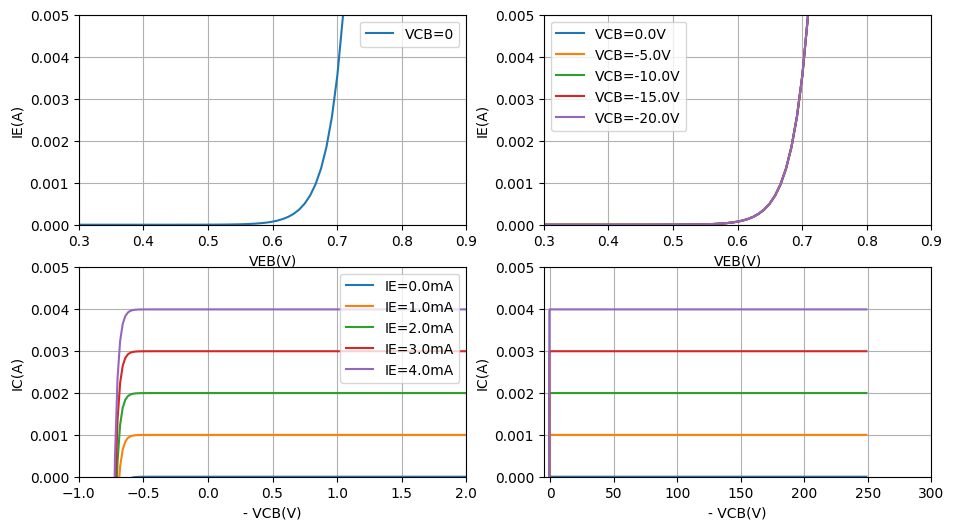

In [34]:
# Exercise 11.7 page 408
#BJT0 Constants and Ebers-Moll parameters(subprogram BJT0)
from constant import q,m0,e0,hbar,mn,e_si,k,kB,mp,kT_q,Eg,Nc,Nv,ni,mun,mup,resistancep
import numpy as np, matplotlib.pyplot as plt

T=300; ni=1e10; Ks=e_si; kT=k*T
A=1e-4; WB=2e-4
NE=1.0e18; muE=mun(T,NE); DE=k*T*muE; tauE=1e-7; LE=np.sqrt(DE*tauE); nE0=ni**2/NE
NB=1.5e16; muB=mup(T,NB); DB=k*T*muB; tauB=1e-6; LB=np.sqrt(DB*tauB); pB0=ni**2/NB
NC=1.5e15; muC=mun(T,NE); DC=k*T*muC; tauC=1e-6; LC=np.sqrt(DC*tauC); nC0=ni**2/NC

VbiE=kT*np.log(NE*NB/ni**2)
VbiC=kT*np.log(NC*NB/ni**2)
VCB0=50; VCE0=50
print(f"VbiE={VbiE:.5f},VbiC={VbiC:.5f},VCB0={VCB0:.2f},VCE0={VCE0:.2f}")

#Ebers-Moll parameter computation(W=WB)
W=WB
fB=(DB/LB)*pB0*(np.cosh(W/LB)/np.sinh(W/LB))
IF0=q*A*((DE/LE)*nE0+fB)
IR0=q*A*((DC/LC)*nC0+fB)
aF=q*A*(DB/LB)*(pB0/np.sinh(W/LB))/IF0
aR=q*A*(DB/LB)*(pB0/np.sinh(W/LB))/IR0
print(f"W={W:.2e},fB={fB:.2e},IF0={IF0:.2e},IR0={IR0:.2e},aF={aF:.5f},xp={aR:.5f}")

VCBO=60*(NC/1e16)**(-3/4)
m=6; VCEO=VCBO*(1-aF)**(1/m)
print(f"VCBO={VCBO:.2f}, VCEO={VCEO:.2f}")

plt.figure(figsize=(11,6))
#---------------------------------------------------------------------
#Common-Base Input characateristics_Theory
VCB=0
VEB=np.linspace(0,VbiE,101)
IE=IF0*(np.exp(VEB/kT)-1)-aF*IR0*(np.exp(VCB/kT-1))
plt.subplot(2, 2, 1)
plt.plot(VEB,IE, label="VCB=0")
plt.xlim(0.3,0.9), plt.ylim(0,5e-3)
plt.xlabel("VEB(V)"), plt.ylabel("IE(A)")
plt.grid(), plt.legend()

#---------------------------------------------------------------------
#Common-Base Input characteristics_Theory
VCB=[0,-5,-10,-15,-20]
VEB=np.linspace(0,VbiE,101)
#IE = np.zeros((len(VCB), len(VEB)))
for i in range(len(VCB)):
    IE=IF0*(np.exp(VEB/kT)-1)-aF*IR0*(np.exp(VCB[i]/kT-1))
    plt.subplot(2, 2, 2)
    plt.plot(VEB,IE,label=f"VCB={VCB[i]:.1f}V")
    plt.xlim(0.3,0.9), plt.ylim(0,5e-3)
    plt.xlabel("VEB(V)"), plt.ylabel("IE(A)")
plt.grid(),plt.legend()

#---------------------------------------------------------------------
#Common-Base Output characterisitcs
IE=[0,1,2,3,4]
VCB1=np.linspace(2,0,101)
VCB2=np.linspace(0,-VCB0,101)
VCB=np.concatenate([VCB1,VCB2])
for i in range(len(IE)):
    IC=(aF*IE[i]*1e-3-(1-aF*aR)*IR0*(np.exp(VCB/kT)-1))
    plt.subplot(2,2,3)
    plt.plot(-VCB,IC,label=f"IE={IE[i]:.1f}mA")
    plt.xlim(-1,2), plt.ylim(0,5e-3)
    plt.xlabel("- VCB(V)"), plt.ylabel("IC(A)")
plt.grid(),plt.legend()

#---------------------------------------------------------------------
#Common-Base Output characterisitcs
IE=[0,1,2,3,4]
VCB1=np.linspace(2,0,101)
VCB2=np.linspace(0,-VCBO,101)
VCB=np.concatenate([VCB1,VCB2])
for i in range(len(IE)):
    IC=(aF*IE[i]*1e-3-(1-aF*aR)*IR0*(np.exp(VCB/kT)-1))
    plt.subplot(2,2,4)
    plt.plot(-VCB,IC,label=f"IE={IE[i]:.1f}mA")
    plt.xlim(-5,300), plt.ylim(0,5e-3)
    plt.xlabel("- VCB(V)"), plt.ylabel("IC(A)")
plt.grid(),plt.legend

plt.show()

VbiE=0.84382,VbiC=0.67573,VCB0=2.00,VCE0=2.00
W=2.50e-04,fB=3.04e+08,IF0=4.88e-15,IR0=7.68e-15,aF=0.99452,xp=0.63148
VCBO=248.93, VCEO=104.51


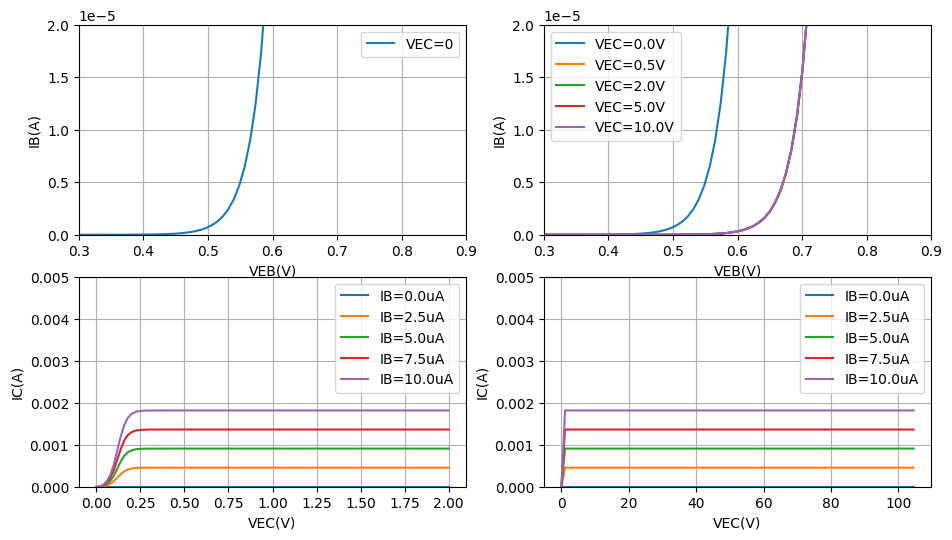

In [7]:
# Exercise 11.7 page 406
#BJT0 Constants and Ebers-Moll parameters(subprogram BJT0)
from constant import q,m0,e0,hbar,mn,e_si,k,kB,mp,kT_q,Eg,Nc,Nv,ni,mun,mup,resistancep
import numpy as np, matplotlib.pyplot as plt

T=300; ni=1e10; Ks=e_si; kT=k*T
A=1e-4; WB=2.5e-4
NE=1.0e18; muE=mun(T,NE); DE=k*T*muE; tauE=1e-7; LE=np.sqrt(DE*tauE); nE0=ni**2/NE
NB=1.5e16; muB=mup(T,NB); DB=k*T*muB; tauB=1e-6; LB=np.sqrt(DB*tauB); pB0=ni**2/NB
NC=1.5e15; muC=mun(T,NE); DC=k*T*muC; tauC=1e-6; LC=np.sqrt(DC*tauC); nC0=ni**2/NC

VbiE=kT*np.log(NE*NB/ni**2)
VbiC=kT*np.log(NC*NB/ni**2)
VCB0=2; VCE0=2
print(f"VbiE={VbiE:.5f},VbiC={VbiC:.5f},VCB0={VCB0:.2f},VCE0={VCE0:.2f}")

#Ebers-Moll parameter computation(W=WB)
W=WB
fB=(DB/LB)*pB0*(np.cosh(W/LB)/np.sinh(W/LB))
IF0=q*A*((DE/LE)*nE0+fB)
IR0=q*A*((DC/LC)*nC0+fB)
aF=q*A*(DB/LB)*(pB0/np.sinh(W/LB))/IF0
aR=q*A*(DB/LB)*(pB0/np.sinh(W/LB))/IR0
print(f"W={W:.2e},fB={fB:.2e},IF0={IF0:.2e},IR0={IR0:.2e},aF={aF:.5f},xp={aR:.5f}")

VCBO=60*(NC/1e16)**(-3/4)
m=6; VCEO=VCBO*(1-aF)**(1/m)
print(f"VCBO={VCBO:.2f}, VCEO={VCEO:.2f}")

plt.figure(figsize=(11,6))
#---------------------------------------------------------------------
#Common-Emitter Input characateristics_Theory
VEC=0
VEB=np.linspace(0,VbiE,101)
IB0=(1-aF)*IF0+(1-aR)*IR0
IB1=(1-aF)*IF0+(1-aR)*IR0*np.exp(-VEC/kT)
IB=(IB1*np.exp(VEB/kT)-IB0)
plt.subplot(2, 2, 1)
plt.plot(VEB,IB, label="VEC=0")
plt.xlim(0.3,0.9), plt.ylim(0,20e-6)
plt.xlabel("VEB(V)"), plt.ylabel("IB(A)")
plt.grid(), plt.legend()

#---------------------------------------------------------------------
#Common-Emitter Input characateristics_Theory
VEC=[0,0.5,2,5,10]
VEB=np.linspace(0,VbiE,101)
for i in range(len(VEC)):
    IB0=(1-aF)*IF0+(1-aR)*IR0
    IB1=(1-aF)*IF0+(1-aR)*IR0*np.exp(-VEC[i]/kT)
    IB=(IB1*np.exp(VEB/kT)-IB0)
    plt.subplot(2, 2, 2)
    plt.plot(VEB,IB, label=f"VEC={VEC[i]:.1f}V")
plt.xlim(0.3,0.9), plt.ylim(0,20e-6)
plt.xlabel("VEB(V)"), plt.ylabel("IB(A)")
plt.grid(), plt.legend()

#---------------------------------------------------------------------
#Common-Emitter Output characateristics_Theory
IB=[0,2.5,5,7.5,10]
VECA=np.linspace(0,VCE0/50,101)
VECB=np.linspace(VCE0/50,VCE0,101)
VEC=np.concatenate([VECA,VECB])
for i in range(len(IB)):
    IB0=(1-aF)*IF0+(1-aR)*IR0
    IB1=(1-aF)*IF0+(1-aR)*IR0*np.exp(-VEC/kT)
    IC=((aF*IF0-IR0*np.exp(-VEC/kT))*(IB[i]*1e-6+IB0)/IB1+IR0-aF*IR0)
    plt.subplot(2, 2, 3)
    plt.plot(VEC,IC, label=f"IB={IB[i]:.1f}uA")
    #plt.xlim(-1,2), 
plt.ylim(0,5e-3)
plt.xlabel("VEC(V)"), plt.ylabel("IC(A)")
plt.grid(), plt.legend()

#---------------------------------------------------------------------
#Common-Emitter Output characateristics_Theory
IB=[0,2.5,5,7.5,10]
VECA=np.linspace(0,VCE0/50,101)
VECB=np.linspace(VCE0/50,VCEO,101)
VEC=np.concatenate([VECA,VECB])
for i in range(len(IB)):
    IB0=(1-aF)*IF0+(1-aR)*IR0
    IB1=(1-aF)*IF0+(1-aR)*IR0*np.exp(-VEC/kT)
    IC=((aF*IF0-IR0*np.exp(-VEC/kT))*(IB[i]*1e-6+IB0)/IB1+IR0-aF*IR0)
    plt.subplot(2, 2, 4)
    plt.plot(VEC,IC, label=f"IB={IB[i]:.1f}uA")
    #plt.xlim(-1,300), 
plt.ylim(0,5e-3)
plt.xlabel("VEC(V)"), plt.ylabel("IC(A)")
plt.grid(), plt.legend()

plt.show()

VCBO=248.93, VCEO=90.86


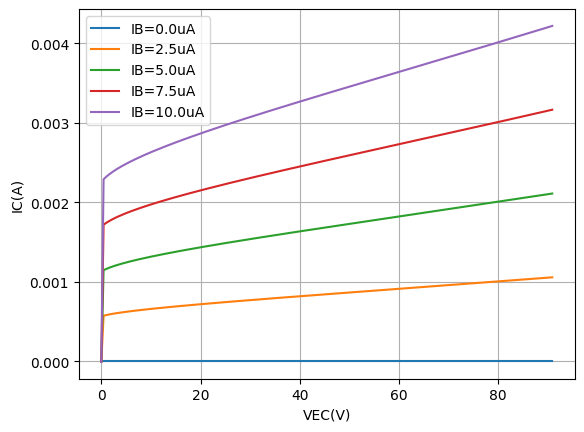

In [11]:
# Exercise 11.10 page 418 base-width modulation and carrier multiplication
#BJT0 Constants and Ebers-Moll parameters(subprogram BJT0)
from constant import q,m0,e0,hbar,mn,e_si,k,kB,mp,kT_q,Eg,Nc,Nv,ni,mun,mup,resistancep
import numpy as np, matplotlib.pyplot as plt

T=300; ni=1e10; Ks=e_si; kT=k*T
A=1e-4; WB=2.5e-4
NE=1.0e18; muE=mun(T,NE); DE=k*T*muE; tauE=1e-7; LE=np.sqrt(DE*tauE); nE0=ni**2/NE
NB=1.5e16; muB=mup(T,NB); DB=k*T*muB; tauB=1e-6; LB=np.sqrt(DB*tauB); pB0=ni**2/NB
NC=1.5e15; muC=mun(T,NE); DC=k*T*muC; tauC=1e-6; LC=np.sqrt(DC*tauC); nC0=ni**2/NC

VbiE=kT*np.log(NE*NB/ni**2)
VbiC=kT*np.log(NC*NB/ni**2)
#---------------------------------------------------------------------
# #Base-width modulation-included calculation of Ebers-Moll parameters, Common-Emitter Output characteristics
IB=[0,2.5,5,7.5,10]
VEC = np.linspace(0, VCEO, 201)
for i in range(len(IB)):
    IC=[]
    for V in VEC:
        VEB=0
        VCB=VEB-V
        xnEB=np.sqrt(2*Ks*e0/q*(NE/(NB*(NE+NB)))*(VbiE-VEB))
        xnCB=np.sqrt(2*Ks*e0/q*(NC/(NB*(NC+NB)))*(VbiC-VCB))
        W=WB-xnEB-xnCB
        if W <= 0:
            W = 1e-9  # Avoid negative or zero base width
        fB=(DB/LB)*pB0*(np.cosh(W/LB)/np.sinh(W/LB))
        IF0=q*A*((DE/LE)*nE0+fB)
        IR0=q*A*((DC/LC)*nC0+fB)
        aF=q*A*(DB/LB)*(pB0/np.sinh(W/LB))/IF0
        aR=q*A*(DB/LB)*(pB0/np.sinh(W/LB))/IR0
        IB0=(1-aF)*IF0+(1-aR)*IR0
        IB1=(1-aF)*IF0+(1-aR)*IR0*np.exp(-V/kT)
        IC.append(((aF*IF0-IR0*np.exp(-V/kT))*(IB[i]*1e-6+IB0)/IB1+IR0-aF*IR0))
    IC=np.array(IC)
    plt.plot(VEC,IC, label=f"IB={IB[i]:.1f}uA")

# Carrier Multiplication
VCBO=60*(NC/1e16)**(-3/4)
m=6; VCEO=VCBO*(1-aF)**(1/m)
print(f"VCBO={VCBO:.2f}, VCEO={VCEO:.2f}")

plt.xlabel("VEC(V)"), plt.ylabel("IC(A)")
plt.grid(), plt.legend()

plt.show()

VCBO=248.93, VCEO=90.86


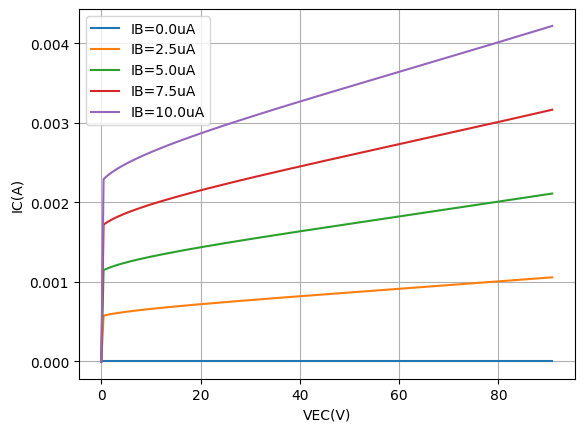

In [12]:
# Exercise 11.10 page 418 base-width modulation and carrier multiplication
#BJT0 Constants and Ebers-Moll parameters(subprogram BJT0)
from constant import q,m0,e0,hbar,mn,e_si,k,kB,mp,kT_q,Eg,Nc,Nv,ni,mun,mup,resistancep
import numpy as np, matplotlib.pyplot as plt

T=300; ni=1e10; Ks=e_si; kT=k*T
A=1e-4; WB=2.5e-4
NE=1.0e18; muE=mun(T,NE); DE=k*T*muE; tauE=1e-7; LE=np.sqrt(DE*tauE); nE0=ni**2/NE
NB=1.5e16; muB=mup(T,NB); DB=k*T*muB; tauB=1e-6; LB=np.sqrt(DB*tauB); pB0=ni**2/NB
NC=1.5e15; muC=mun(T,NE); DC=k*T*muC; tauC=1e-6; LC=np.sqrt(DC*tauC); nC0=ni**2/NC

VbiE=kT*np.log(NE*NB/ni**2)
VbiC=kT*np.log(NC*NB/ni**2)

#---------------------------------------------------------------------
# #Base-width modulation-included calculation of Ebers-Moll parameters, Common-Emitter Output characteristics
IB=[0,2.5,5,7.5,10]
VEC = np.linspace(0, VCEO, 201)
for i in range(len(IB)):
    IC = np.zeros(len(VEC))  # Initialize IC as a zero array with the same length as VEC
    for j, V in enumerate(VEC):
        VEB=0
        VCB=VEB-V
        xnEB=np.sqrt(2*Ks*e0/q*(NE/(NB*(NE+NB)))*(VbiE-VEB))
        xnCB=np.sqrt(2*Ks*e0/q*(NC/(NB*(NC+NB)))*(VbiC-VCB))
        W=WB-xnEB-xnCB
        if W <= 0:
            W = 1e-9  # Avoid negative or zero base width
        fB=(DB/LB)*pB0*(np.cosh(W/LB)/np.sinh(W/LB))
        IF0=q*A*((DE/LE)*nE0+fB)
        IR0=q*A*((DC/LC)*nC0+fB)
        aF=q*A*(DB/LB)*(pB0/np.sinh(W/LB))/IF0
        aR=q*A*(DB/LB)*(pB0/np.sinh(W/LB))/IR0
        IB0=(1-aF)*IF0+(1-aR)*IR0
        IB1=(1-aF)*IF0+(1-aR)*IR0*np.exp(-V/kT)
        IC[j]=((aF*IF0-IR0*np.exp(-V/kT))*(IB[i]*1e-6+IB0)/IB1+IR0-aF*IR0)  # Store the result in IC[j]
    plt.plot(VEC,IC, label=f"IB={IB[i]:.1f}uA")

# Carrier Multiplication
VCBO=60*(NC/1e16)**(-3/4)
m=6; VCEO=VCBO*(1-aF)**(1/m)
print(f"VCBO={VCBO:.2f}, VCEO={VCEO:.2f}")

plt.xlabel("VEC(V)"), plt.ylabel("IC(A)")
plt.grid(), plt.legend()

plt.show()

In [103]:
# Exercise 11.8, page 413
# pnp BJT, VEB=0, T=300K, determin the VCB that will lead to punch-through
from constant import q,m0,e0,hbar,mn,e_si,k,kB,mp,kT_q,Eg,Nc,Nv,ni,mun,mup,resistancep
import numpy as np, matplotlib.pyplot as plt

T=300
NE=1e18; muE=263; DE=6.81; tauE=1e-7; LE=8.25e-4
NB=1e16; muB=437; DB=11.3; tauB=1e-6; LB=3.36e-3; WB=2e-4
NC=1e15; muC=1345; DC=34.8; tauC=1e-6; LC=5.90e-3

T=300
kT=k*T
Ks=e_si
ni=ni = 1.0e10
VEB=0

VbiEB=kT*np.log(NE*NB/ni**2)
VbiCB=kT*np.log(NC*NB/ni**2)
xnEB=np.sqrt(2*Ks*e0/q*NE/(NB*(NE+NB))*(VbiEB-VEB))
#xnCB=np.sqrt(2*Ks*e0/q*NC/(NB*(NC+NB))*(VbiCB-VCB))
VCB=VbiCB-(WB-xnEB)**2/(2*Ks*e0/q*NC/(NB*(NC+NB)))
print(VCB)

-237.53315671295815


In [5]:
# Problem 11.4 page 435
# Sample Ideal-Transistor computations, pnp TR, active mode biasing with VEB=0.7V, VCB=-5V, W~WB, A=1e-4m2
# cosh(W/LB),sinh(W/LB), W/LB all to five significant figures
from constant import q,m0,e0,hbar,mn,e_si,k,kB,mp,kT_q,Eg,Nc,Nv,ni,mun,mup,resistancep
import numpy as np, matplotlib.pyplot as plt

T=300
NE=1e18; muE=263; DE=6.81; tauE=1e-7; LE=8.25e-4
NB=1e16; muB=437; DB=11.3; tauB=1e-6; LB=3.36e-3; WB=2e-4
NC=1e15; muC=1345; DC=34.8; tauC=1e-6; LC=5.90e-3
#q=1.6e-19; ni=1e10; kT=0.0259

VEB=0.7; VCB=-5; W=WB; A=1e-4
c=np.cosh(W/LB); s=np.sinh(W/LB); r=W/LB
print(f"cosh={c:.5f},sinh={s:.5f},W/LB={c:.5f}")

#minority carrier concentration
nE0=ni(T)**2/NE; pB0=ni(T)**2/NB; nC0=ni(T)**2/NC
print(f'nE0={nE0:.5f},pB0={pB0:.5f},nC0={nC0:.5f}')

#Eq 11.28, 11.29
IEp=q*A*DB*pB0/LB*(c/s*(np.exp(VEB/(k*T))-1)-1/s*(np.exp(VCB/(k*T))-1))
IEn=q*A*DE/LE*nE0*(np.exp(VEB/(k*T))-1)
ICp=q*A*DB*pB0/LB*(1/s*(np.exp(VEB/(k*T))-1)-c/s*(np.exp(VCB/k*T)-1))
ICn=-q*A*DC/LC*nC0*(np.exp(VCB/(k*T))-1)
print(f'IEp={IEp:.5f},IEn={IEn:.5f},ICp={ICp:.5f},ICn={ICn:.5f}')

IE=IEp+IEn; IC=ICp+ICn; IB=IE-IC
print(f'IE={IE:.5f},IC={IC:.5f},IB={IB:.3e}')

# page 381, 10.4 Introductory operational considerations
IB1=IEn; IB2=IEp-ICp; IB3=-ICn
print(f'IB1={IB1:.3e},IB2={IB2:.3e},IB3={IB3:.3e}')

gamma=IEp/(IEp+IEn); alphaT=ICp/IEp; alphadc=gamma*alphaT; betadc=alphadc/(1-alphadc)
print(f'gamma={gamma:.5f},alphaT={alphaT:.5f},alphadc={alphadc:.5f},betadc={betadc:.5f}')

cosh=1.00177,sinh=0.05956,W/LB=1.00177
nE0=100.09221,pB0=10009.22054,nC0=100092.20538
IEp=0.00522,IEn=0.00001,ICp=0.00521,ICn=0.00000
IE=0.00523,IC=0.00521,IB=1.685e-05
IB1=7.616e-06,IB2=9.233e-06,IB3=-9.459e-15
gamma=0.99854,alphaT=0.99823,alphadc=0.99678,betadc=309.22325


### Minority carrier lifetime page 131
Lp: hole diffusion length, NT: number of R-G centers/cm3, cp: a positive proportionality constant, capture coefficients, taup: minority carrier lifetime\
$\partial p/\partial t|_{i-thermal\ R-G}$  and $\partial n/\partial t|_{i-thermal\ R-G}$ , **it must be remembered**, characterize the net effect of the thermal recombination and thermal generation processes.\
$\langle t \rangle=\tau_n(or\ \tau_p)$. physically, therefore, $\tau_n$ and $\tau_p$ have come to be interpreted as the average time an excess minority carrier will live in a sea of majority carriers.\
Moreoover, the physical nature of the dominant R-G center concentration changes even within a given sample during device fabrication. A fabrication procedure called ''gettering'' can reduce the R-G center concentration to a very low level and give rise to a $\tau_n$($\tau_p$) ~ 1nsec. Minority carrier lifetimes in completed Si device tend to lie about midway between the cited extremes.

minority carrier diffusion lengths: the average distance minority carriers can diffuse into a sea of majority carriers before being annihilated.
$$\langle x \rangle=\frac{\int_0^\infty x \Delta p_n(x)dx}{\int_0^\infty \Delta p_n(x)dx}=L_p $$
$$\langle x \rangle=\frac{\int_0^\infty x \Delta n_p(x)dx}{\int_0^\infty \Delta n_p(x)dx}=L_n $$
the average distance\
$L_p=\sqrt{D_p \tau_p}$  ,   $D_p/\mu_p=kT/q$  ,   $\tau_p=1/(c_pN_T)$\
$L_n=\sqrt{D_n \tau_n}$  ,   $D_n/\mu_n=kT/q$  ,   $\tau_n=1/(c_nN_T)$\
Lp: hole diffusion length, NT: number of R-G centers/cm3, cp: a positive proportionality constant, capture coefficients, taup: minority carrier lifetime

In [3]:
from constant import q,m0,e0,hbar,mn,e_si,k,kB,mp,kT_q,Eg,Nc,Nv,ni,mun,mup,resistancep
import numpy as np, matplotlib.pyplot as plt
T=300
ND=1e15 # pn diode에서 n에서 소수 carrier는 p인데, 이 때 non-degenerate해야 하므로 ND로 계산될 수 있다.
taup=1e-6 # 하지만 움직이는 것은 hole이므로 p가 된다.
Lp=np.sqrt(k*T*mup(T,ND)*taup)
print(Lp)

0.0034472088235367572


#### Base Region Solution page 395
minority carrier distribution in base region
$$\Delta p_B(x)=A_1e^{-x/L_B}+A_2e^{x/L_B} $$
general solution
$$\Delta p_B(x)=\Delta p_B(0)\left(\frac{e^{(W-x)/L_B}-e^{-(W-x)/L_B}}{e^{W/L_B}-e^{-W/L_B}} \right)+\Delta p_B(W)\left(\frac{e^{x/L_B}-e^{-x/L_B}}{e^{W/L_B}-e^{-W/L_B}} \right)$$
more compactly in terms of the sinh function
$$\Delta p_B(x)=\Delta p_B(0)\frac{sinh[(W-x)/L_B]}{sinh(W/L_B)}+\Delta p_B(W)\frac{sinh(x/L_B)}{sinh(W/L_B)}  $$
if $V_{CB}=0, \Delta p_B(W)=0$, reduces to the narrow-base diode solution.
$$\Delta p_B(x)/\Delta p_B(0)=\frac{sinh(W/L_B-x/L_B)}{sinh(W/L_B)}=\frac{sinh(W/L_B(1-L_B/W*x/L_B)}{sinh(W/L_B)}  $$

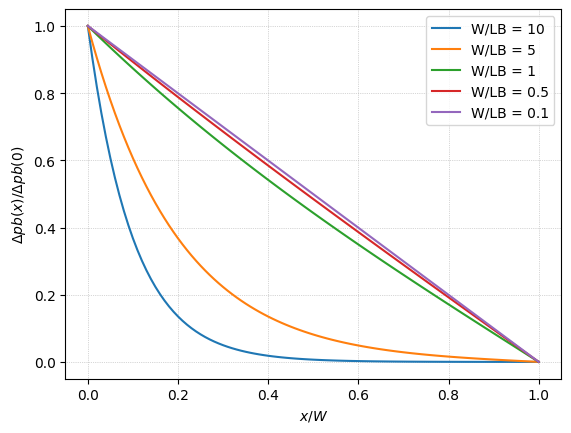

In [5]:
# Problem 11.5 page 435
# pnp Tr, minority carrier distribution on W/LB ratio, VCB=0, DPb(W)=0, DPb(x)/DPb(0) vs. x/W corresponding to W/LB=10,5,1,0.5,0.1
# 0<DPb(x)/DPn(0)<1 and 0<x/W<1
from constant import q,m0,e0,hbar,mn,e_si,k,kB,mp,kT_q,Eg,Nc,Nv,ni,mun,mup,resistancep
import numpy as np, matplotlib.pyplot as plt
# Dpb(x)/Dpb(0) vs x/W(VCB=0)
# r=W/LB, z=x/W, Dpbr=Dpb(x)/Dpb(0)
'''
z=np.linspace(0,1,101)
for i in [10,5,1,0.5,0.1]:
    Dpbr=np.sinh(i*(1-z))/np.sinh(i)
    plt.plot(z,Dpbr,label=f'W/LB = {i}')
'''
r=[10,5,1,0.5,0.1]
z=np.linspace(0,1,101)
for i in range(len(r)):
    Dpbr=np.sinh(r[i]*(1-z))/np.sinh(r[i])
    plt.plot(z,Dpbr,label=f'W/LB = {r[i]}')

plt.xlabel(r"$x/W$"), plt.ylabel(r"$\Delta pb(x)/\Delta pb(0)$")
plt.grid(True, which='both', linestyle=':', linewidth=0.5)
plt.legend()
plt.show()


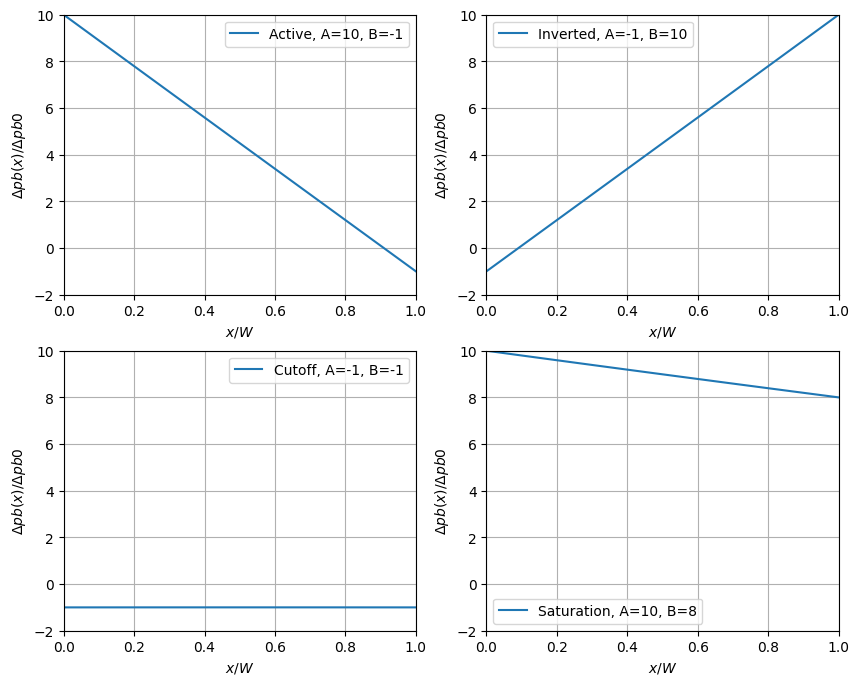

In [56]:
# Problem 11.6 page 435
# BJT biasing modes illustration, pnp Tr, W/LV<<1, Dpb(0)/pb0, Dpb(W)/pb0 to be <10
#enumerate는 (index, (a,b)) tuple 형식으로 묶여 index를 활용할 수 있다. 따라서 Dpbr을 사용할 때 A=10, B=-1을 Dpbr 수식에 넣고, index를 부여한다.
#확인 방법은 print(idx,a,b,z) 사용해 보자.
from constant import q,m0,e0,hbar,mn,e_si,k,kB,mp,kT_q,Eg,Nc,Nv,ni,mun,mup,resistancep
import numpy as np, matplotlib.pyplot as plt

r=0.1
z=np.linspace(0,1,11)
A=[10,-1,-1,10]
B=[-1,10,-1,8]
Dpbr = np.zeros((len(A),len(z)))  # Initialize a 2D array, len(B)를 넣으면, Dpbr의 정의에 의해 error가 발생함.
for idx,(a,b) in enumerate(zip(A,B)): 
    Dpbr[idx,:] = a*np.sinh(r*(1-z))/np.sinh(r)+b*np.sinh(r*z)/np.sinh(r)

plt.figure(figsize=(10,8))

plt.subplot(2, 2, 1)
plt.plot(z,Dpbr[0,:],label="Active, A=10, B=-1")
plt.xlim(0,1), plt.ylim(-2, 10)
plt.xlabel(r"$x/W$"), plt.ylabel(r"$\Delta pb(x)/\Delta pb0$")
plt.legend(), plt.grid()

plt.subplot(2, 2, 2)
plt.plot(z,Dpbr[1,:],label="Inverted, A=-1, B=10")
plt.xlim(0,1), plt.ylim(-2, 10)
plt.xlabel(r"$x/W$"), plt.ylabel(r"$\Delta pb(x)/\Delta pb0$")
plt.legend(), plt.grid()

plt.subplot(2, 2, 3)
plt.plot(z,Dpbr[2,:],label="Cutoff, A=-1, B=-1")
plt.xlim(0,1), plt.ylim(-2, 10)
plt.xlabel(r"$x/W$"), plt.ylabel(r"$\Delta pb(x)/\Delta pb0$")
plt.legend(), plt.grid()

plt.subplot(2, 2, 4)
plt.plot(z,Dpbr[3,:],label="Saturation, A=10, B=8")
plt.xlim(0,1), plt.ylim(-2, 10)
plt.xlabel(r"$x/W$"), plt.ylabel(r"$\Delta pb(x)/\Delta pb0$")
plt.legend(), plt.grid()

plt.tight_layout
plt.show()

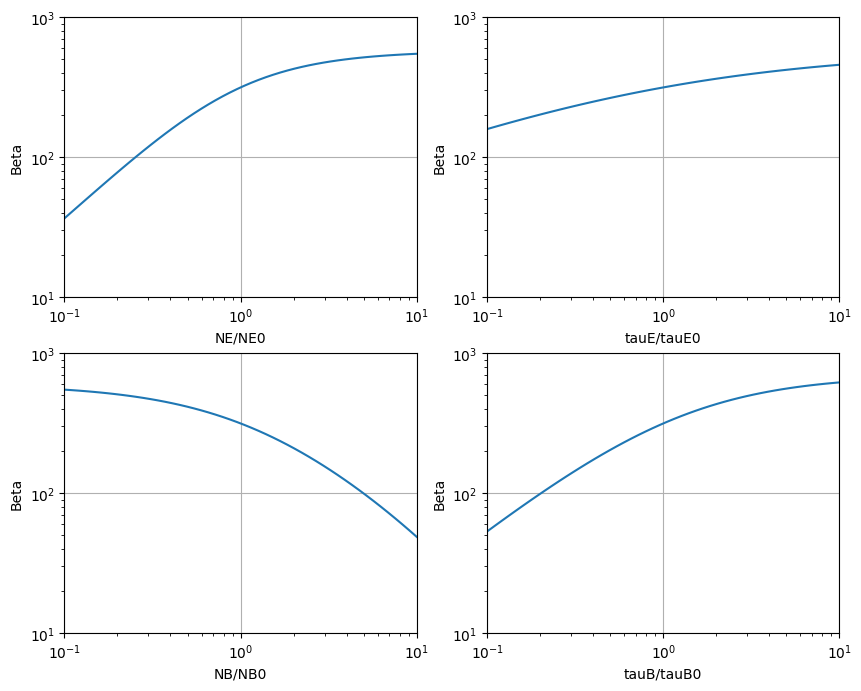

In [86]:
# Problem 11.10
# Beta calcuation, page 399
from constant import q,m0,e0,hbar,mn,e_si,k,kB,mp,kT_q,Eg,Nc,Nv,ni,mun,mup,resistancep
import numpy as np, matplotlib.pyplot as plt

T=300
NE0=1e18; tauE0=1e-7
NB0=1e16; tauB0=1e-6; WB=2e-4
kT=k*T
W=WB
#Base
NB=NB0; muB=mup(T,NB0); DB=kT*muB; tauB=tauB0; LB=np.sqrt(DB*tauB)

#Emitter for Beta vs NE/NE0
NE=np.logspace(np.log10(NE0*0.1),np.log10(NE0*10))
muE=mun(T,NE); DE=kT*muE; tauE=tauE0; LE=np.sqrt(DE*tauE)
betadc=1/(DE/DB*NB/NE*W/LE+0.5*(W/LB)**2)
X=NE/NE0

plt.figure(figsize=(10,8))
plt.subplot(2, 2, 1)
plt.loglog(X,betadc)
plt.xlim(0.1,10), plt.ylim(10, 1000),plt.xlabel("NE/NE0"), plt.ylabel("Beta"), plt.grid()

#Emitter for Beta vs tauE/tauE0
tauE=np.logspace(np.log10(tauE0*0.1),np.log10(tauE0*10))
NE=NE0; muE=mun(T,NE); DE=kT*muE; LE=np.sqrt(DE*tauE)
betadc=1/(DE/DB*NB/NE*W/LE+0.5*(W/LB)**2)
X=tauE/tauE0

plt.subplot(2, 2, 2)
plt.loglog(X,betadc)
plt.xlim(0.1,10), plt.ylim(10, 1000),plt.xlabel("tauE/tauE0"), plt.ylabel("Beta"), plt.grid()

#Emitter for Beta vs NB/NB0
tauE=tauE0
LE=np.sqrt(DE*tauE)
NB=np.logspace(np.log10(NB0*0.1),np.log10(NB0*10))
muB=mup(T,NB); DB=kT*muB; tauB=tauB0; LB=np.sqrt(DB*tauB)
betadc=1/(DE/DB*NB/NE*W/LE+0.5*(W/LB)**2)
X=NB/NB0

plt.subplot(2, 2, 3)
plt.loglog(X,betadc)
plt.xlim(0.1,10), plt.ylim(10, 1000),plt.xlabel("NB/NB0"), plt.ylabel("Beta"), plt.grid()

#Emitter for Beta vs tauB/tauB0
tauB=np.logspace(np.log10(tauB0*0.1),np.log10(tauB0*10))
NB=NB0; muB=mup(T,NB); DB=kT*muB; LB=np.sqrt(DB*tauB)
betadc=1/(DE/DB*NB/NE*W/LE+0.5*(W/LB)**2)
X=tauB/tauB0

plt.subplot(2, 2, 4)
plt.loglog(X,betadc)
plt.xlim(0.1,10), plt.ylim(10, 1000),plt.xlabel("tauB/tauB0"), plt.ylabel("Beta"), plt.grid()

plt.show()


In [105]:
# Problem 11.16, Exercise 11.8 
# pnp BJT, VEB=0.7V, T=300K, determin the VCB that will lead to punch-through
from constant import q,m0,e0,hbar,mn,e_si,k,kB,mp,kT_q,Eg,Nc,Nv,ni,mun,mup,resistancep
import numpy as np, matplotlib.pyplot as plt

T=300
NE=1e18; muE=263; DE=6.81; tauE=1e-7; LE=8.25e-4
NB=1e16; muB=437; DB=11.3; tauB=1e-6; LB=3.36e-3; WB=2e-4
NC=1e15; muC=1345; DC=34.8; tauC=1e-6; LC=5.90e-3

T=300
kT=k*T
Ks=e_si
ni= 1.0e10
VEB=0.7

VbiEB=kT*np.log(NE*NB/ni**2)
VbiCB=kT*np.log(NC*NB/ni**2)
xnEB=np.sqrt(2*Ks*e0/q*NE/(NB*(NE+NB))*(VbiEB-VEB))
#xnCB=np.sqrt(2*Ks*e0/q*NC/(NB*(NC+NB))*(VbiCB-VCB))
VCB=VbiCB-(WB-xnEB)**2/(2*Ks*e0/q*NC/(NB*(NC+NB)))
print(VCB)

-296.5938939667989


In [18]:
# Problem 11.18 page 441
# V_epsilon referred to as the early voltage
B=(4.354e-3-3.228e-3)/(10e-6*(101.2-40.9))
V=101.2-4.354e-3/(B*10e-6)
V

-131.96714031971578

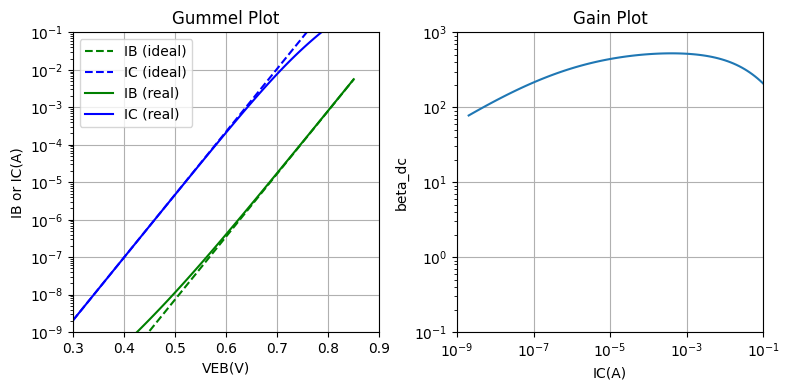

In [41]:
# Problem 11.20 page 441 Gummel and Gain plots
# Approximately account for the recombination-generation current arising from the E-B depletion region by adding
# I_RG=I02(exp((qVEB/(n2kT))-1) to ideal device base current, I02-1e-14, n2=1.5
# To approximately account for high-level injection and other collector current nonidealities, multiply the ideal device collector current
# by the correction factor, gamma=1/(1+e^(q(VEB-0.75)/(2kT))), IC=gamma*IC_ideal
from constant import q,m0,e0,hbar,mn,e_si,k,kB,mp,kT_q,Eg,Nc,Nv,ni,mun,mup,resistancep
import numpy as np, matplotlib.pyplot as plt

T=300
NE=1e18; muE=263; DE=6.81; tauE=1e-7; LE=8.25e-4
NB=1e16; muB=437; DB=11.3; tauB=1e-6; LB=3.36e-3; WB=2e-4
NC=1e15; muC=1345; DC=34.8; tauC=1e-6; LC=5.90e-3

kT=k*T; n2=1.5; I02=1e-14; VHi=0.75; VCB=-5
IF0=9.149e-15; IR0=1.857e-14; aF=0.9968; aR=0.4910

# IB and IC Calculations
VEB=np.linspace(0.3,0.85,101)  # Base-emitter voltage (V)
IBideal=IF0*(1-aF)*(np.exp(VEB/kT)-1)
IRG=I02*(np.exp(VEB/(n2*kT))-1)
IB=IBideal+IRG
ICideal=aF*IR0*(np.exp(VEB/kT)-1)
IC=ICideal/(1+np.exp((VEB-VHi)/(2*kT)))
Beta=IC/IB  # DC current gain

plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
plt.semilogy(VEB, IBideal, 'g--', label='IB (ideal)')
plt.semilogy(VEB, ICideal, 'b--', label='IC (ideal)')
plt.semilogy(VEB, IB, 'g-', label='IB (real)')
plt.semilogy(VEB, IC, 'b-', label='IC (real)')
plt.xlim(0.3,0.9), plt.ylim(1e-9,1e-1)
plt.xlabel("VEB(V)"), plt.ylabel("IB or IC(A)")
plt.title('Gummel Plot'), plt.grid(), plt.legend()

plt.subplot(1,2,2)
plt.loglog(IC, Beta)
plt.xlim(1e-9,1e-1), plt.ylim(1e-1,1e3)
plt.xlabel("IC(A)"), plt.ylabel("beta_dc")
plt.title('Gain Plot'), plt.grid()

plt.tight_layout()
plt.show()

In [42]:
# Probelm 11.21
# Excerise 11.10, Fig 11.5(d)
# IC=(1.87*IB)(VEC+132), beta_dc=IC/IB=1.87(VEC+132), beta_dc=256, 266, 275 if respectively VEC=5V, 10V, and 15V